In [1]:
import numpy as np
from psruq.source.postprocessing_utils import get_metrics_results
from psruq.source.table_utils import pretty_matplotlib_config
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from source.models.constants import ModelSource
from source.datasets.constants import DatasetName
from source.losses.constants import LossName
from source.metrics import (
    ApproximationType,
    GName,
    RiskType,
)
from psruq.source.path_utils import REPOSITORY_ROOT

pd.set_option("display.max_rows", None)

stty: 'standard input': Inappropriate ioctl for device


In [2]:
architecture = "resnet18"  # vgg resnet18
training_dataset_name = DatasetName.TINY_IMAGENET.value  # 'cifar10' 'cifar100' 'noisy_cifar10' 'noisy_cifar100' 'missed_class_cifar10'
if training_dataset_name not in [
    "missed_class_cifar10",
    "noisy_cifar10",
    "noisy_cifar100",
]:
    dataset_name_to_extract_from = training_dataset_name
else:
    dataset_name_to_extract_from = training_dataset_name.split("_")[-1]
print(dataset_name_to_extract_from)

temperature = 1.0

model_ids = np.arange(20)

# list_extraction_datasets = [
#     "cifar10",
#     "cifar100",
#     "svhn",
#     "blurred_cifar100",
#     "blurred_cifar10",
# ]
# list_ood_datasets = [el for el in list_extraction_datasets]
model_source = ModelSource.TORCH_UNCERTAINTY.value
if training_dataset_name == DatasetName.TINY_IMAGENET.value:
    loss_function_names = [LossName.CROSS_ENTROPY]
else:
    loss_function_names = [el for el in LossName]

tiny_imagenet


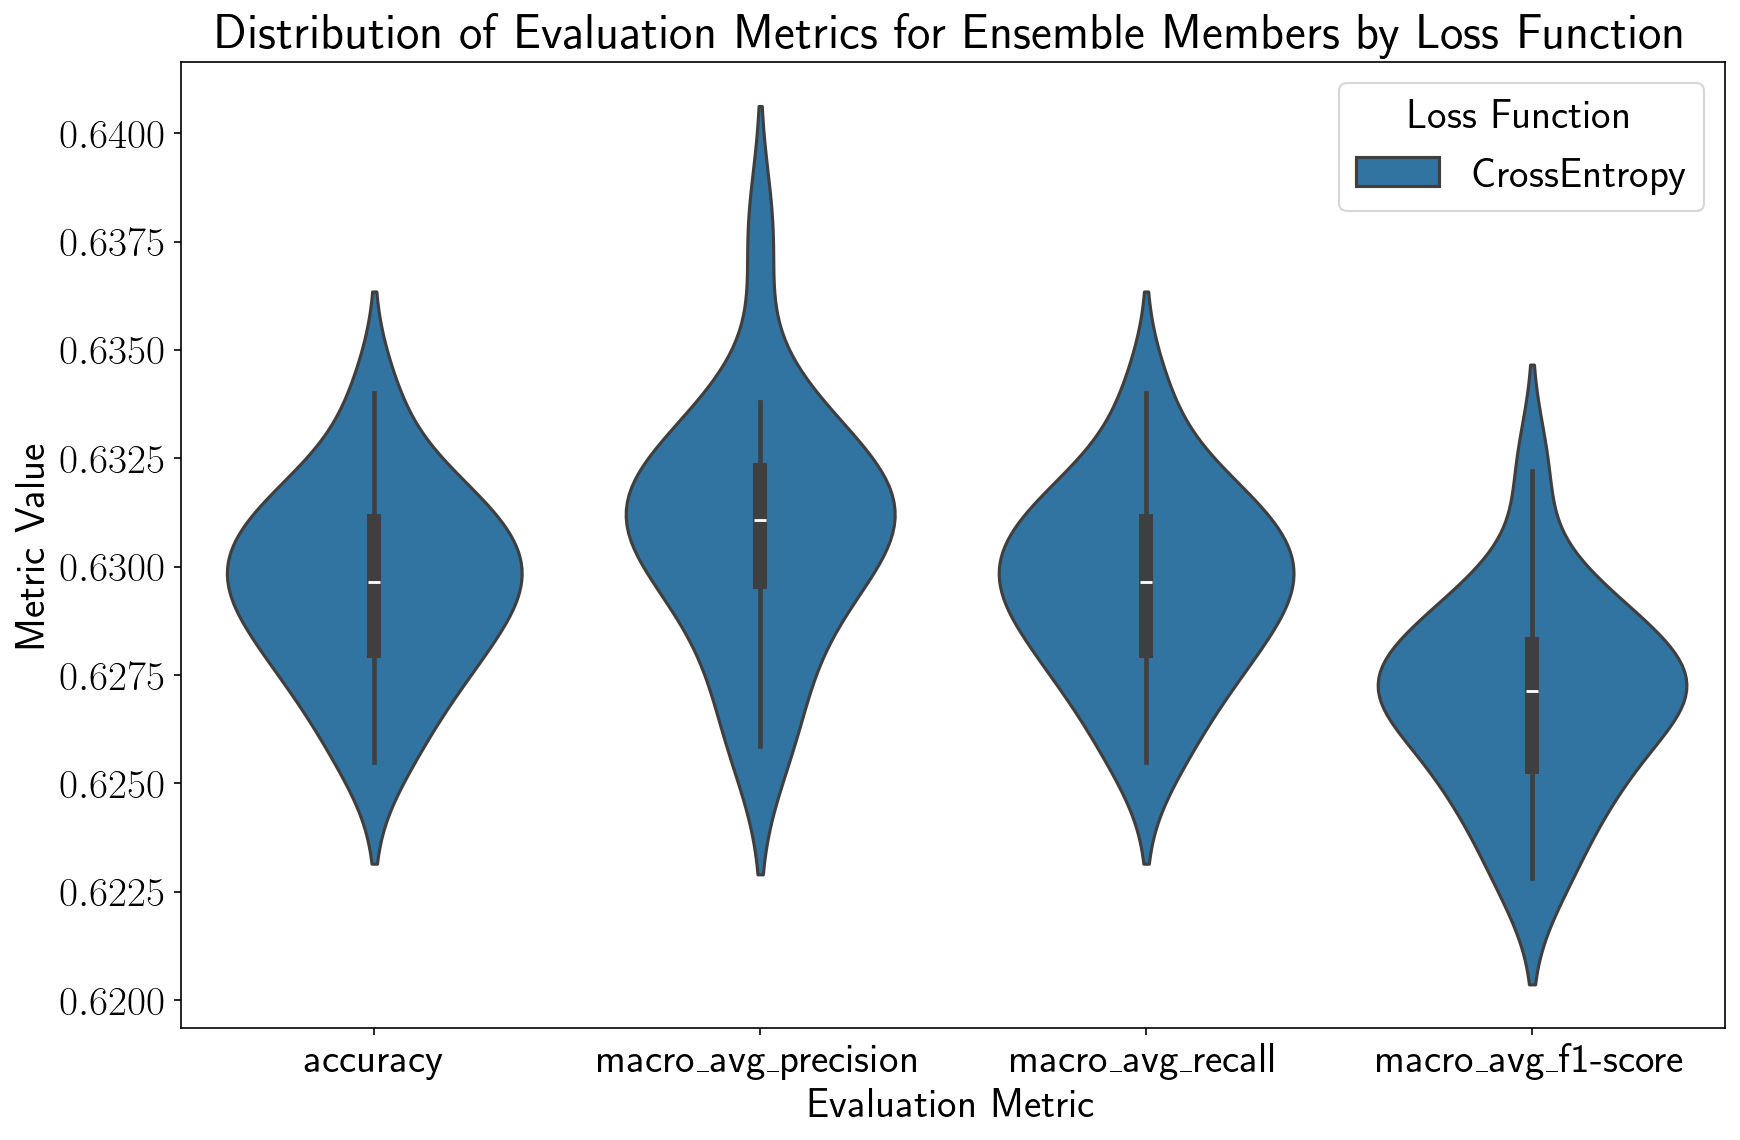

In [7]:
metrics_df = get_metrics_results(
    loss_function_names=loss_function_names,
    training_dataset_name=training_dataset_name,
    architecture=architecture,
    model_ids=model_ids,
    model_source=model_source,
)


pretty_matplotlib_config(fontsize=20, fonttype=42)
# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=150)

# Draw a nested violinplot
sns.violinplot(
    data=metrics_df,
    x="Metric",
    y="Value",
    hue="Loss Function",
    linewidth=1.5,
    hue_order=[
        # LossName.BRIER_SCORE.value,
        LossName.CROSS_ENTROPY.value,
        # LossName.SPHERICAL_SCORE.value,
    ],
)
plt.title("Distribution of Evaluation Metrics for Ensemble Members by Loss Function")
plt.ylabel("Metric Value")
plt.xlabel("Evaluation Metric")
plt.legend(title="Loss Function")

plt.tight_layout()
plt.savefig(f'{REPOSITORY_ROOT}/imgs/trainstats_{architecture}_{training_dataset_name}.pdf')
plt.show()